# Setup

This script processes World Ocean Database Profiles.

Please see pars.py and local_functions.py for global parameters and functions used in this study.

See this documentation on ragged arrays supplied by NOAA: 
https://www.nodc.noaa.gov/OC5/WOD/netcdf_descr.html

In [12]:
# import packages
%run ../../global_packages.py

# get the global parameters
%run ../../global_pars.py

# import your local functions
sys.path.insert(1, '../../')
from global_functions import *

# make sure the figures plot inline rather than at the end
%matplotlib inline

# Parameters and Paths

In [13]:
inpath = "raw_data/concatenated/"
infn = 'all_casts_beginning_to_aug_2020_indian_ocean.nc'
outfn = 'wod_processed.nc'

# Get Data

In [14]:
ds_in = xr.open_dataset(inpath + infn)
ds_in

<xarray.Dataset>
Dimensions:    (cast: 342256, depth: 57)
Coordinates:
  * cast       (cast) int64 0 1 2 3 4 5 ... 342251 342252 342253 342254 342255
  * depth      (depth) int64 0 5 10 15 20 25 ... 1250 1300 1350 1400 1450 1500
Data variables:
    time       (cast) datetime64[ns] ...
    lat        (cast) float32 ...
    lon        (cast) float32 ...
    cast_id    (cast) object ...
    temp       (cast, depth) float64 ...
    sal        (cast, depth) float64 ...
    doxy       (cast, depth) float64 ...
    nitrate    (cast, depth) float64 ...
    phosphate  (cast, depth) float64 ...
Attributes:
    date_created:           03/23/2021
    unmerged_data_url:      https://www.ncei.noaa.gov/access/world-ocean-data...
    geospatial_lat_extent:  decimal degrees north (-2.11,48.733334)
    geospatial_lon_extent:  decimal degrees east (-163.332,102.5)
    help_email:             OCLhelp@noaa.gov
    history:                Merged ../latest/*.nc

# Sort by Time

In [15]:
# round times to nearest day
ds_in["time"] = ds_in.time.dt.floor("D")

# # add time as a coordinate
ds_in = ds_in.assign_coords(unsorted_time=ds_in.time)

# reset profile variables to be with respect to time
ds_in['temp'] = xr.DataArray(ds_in.temp,dims = ['unsorted_time','depth'],coords =[ds_in.time,ds_in.depth])
ds_in['sal'] = xr.DataArray(ds_in.sal,dims = ['unsorted_time','depth'],coords =[ds_in.time,ds_in.depth])
ds_in['doxy'] = xr.DataArray(ds_in.doxy,dims = ['unsorted_time','depth'],coords =[ds_in.time,ds_in.depth])
ds_in['nitrate'] = xr.DataArray(ds_in.nitrate,dims = ['unsorted_time','depth'],coords =[ds_in.time,ds_in.depth])
ds_in['phosphate'] = xr.DataArray(ds_in.phosphate,dims = ['unsorted_time','depth'],coords =[ds_in.time,ds_in.depth])
ds_in['lat'] = xr.DataArray(ds_in.lat,dims = ['unsorted_time'],coords =[ds_in.time])
ds_in['lon'] = xr.DataArray(ds_in.lon,dims = ['unsorted_time'],coords =[ds_in.time])
ds_in['cast_id'] = xr.DataArray(ds_in.cast_id,dims = ['unsorted_time'],coords =[ds_in.time])
# get rid of intial time variable
ds_in = ds_in[['temp','sal','doxy','nitrate','phosphate','lat','lon','cast_id']]

sorted_time = ds_in.unsorted_time.sortby(ds_in.unsorted_time)

# sort based on time
ds_in['temp'] = xr.DataArray(ds_in.temp.sortby(ds_in.unsorted_time),dims = ['time','depth'],coords =[sorted_time,ds_in.depth])
ds_in['sal'] = xr.DataArray(ds_in.sal.sortby(ds_in.unsorted_time),dims = ['time','depth'],coords =[sorted_time,ds_in.depth])
ds_in['doxy'] = xr.DataArray(ds_in.doxy.sortby(ds_in.unsorted_time),dims = ['time','depth'],coords =[sorted_time,ds_in.depth])
ds_in['nitrate'] = xr.DataArray(ds_in.nitrate.sortby(ds_in.unsorted_time),dims = ['time','depth'],coords =[sorted_time,ds_in.depth])
ds_in['phosphate'] = xr.DataArray(ds_in.phosphate.sortby(ds_in.unsorted_time),dims = ['time','depth'],coords =[sorted_time,ds_in.depth])
ds_in['lat'] = xr.DataArray(ds_in.lat.sortby(ds_in.unsorted_time),dims = ['time'],coords =[sorted_time])
ds_in['lon'] = xr.DataArray(ds_in.lon.sortby(ds_in.unsorted_time),dims = ['time'],coords =[sorted_time])
ds_in['cast_id'] = xr.DataArray(ds_in.cast_id.sortby(ds_in.unsorted_time),dims = ['time'],coords =[sorted_time])
ds_in = ds_in[['temp','sal','doxy','nitrate','phosphate','lat','lon','cast_id','time']]
ds_in

<xarray.Dataset>
Dimensions:    (depth: 57, time: 342256)
Coordinates:
  * time       (time) datetime64[ns] 1770-01-01 1770-01-01 ... 2020-07-07
  * depth      (depth) int64 0 5 10 15 20 25 ... 1250 1300 1350 1400 1450 1500
Data variables:
    temp       (time, depth) float64 33.11 nan nan nan nan ... nan nan nan nan
    sal        (time, depth) float64 nan nan nan nan nan ... nan nan nan nan nan
    doxy       (time, depth) float64 nan nan nan nan nan ... nan nan nan nan nan
    nitrate    (time, depth) float64 nan nan nan nan nan ... nan nan nan nan nan
    phosphate  (time, depth) float64 nan nan nan nan nan ... nan nan nan nan nan
    lat        (time) float32 14.366667 14.433333 16.95 ... 12.35 13.299
    lon        (time) float32 99.583336 54.083332 64.35 ... 81.21667 92.1 87.454
    cast_id    (time) object 'OSD_9540691' 'OSD_9540856' ... 'PFL_19992885'
Attributes:
    date_created:           03/23/2021
    unmerged_data_url:      https://www.ncei.noaa.gov/access/world-ocean-dat

Text(0.5, 1.0, 'Sample Profiles')

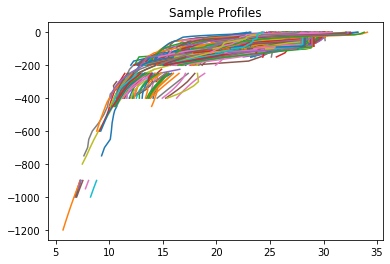

In [16]:
for tt in range(1000):
    plt.plot(ds_in.temp[tt,:],-1*ds_in.depth)
plt.title('Sample Profiles')

# Subset in Time

In [17]:
time_slice = slice(ts, te)
ds_out = ds_in.sel(time = time_slice)
ds_out

<xarray.Dataset>
Dimensions:    (depth: 57, time: 339218)
Coordinates:
  * time       (time) datetime64[ns] 1948-03-10 1948-03-11 ... 2020-05-31
  * depth      (depth) int64 0 5 10 15 20 25 ... 1250 1300 1350 1400 1450 1500
Data variables:
    temp       (time, depth) float64 30.11 29.81 29.54 29.3 ... nan nan nan nan
    sal        (time, depth) float64 34.48 34.58 34.67 34.75 ... nan nan nan nan
    doxy       (time, depth) float64 200.0 199.5 199.0 198.5 ... nan nan nan nan
    nitrate    (time, depth) float64 nan nan nan nan nan ... nan nan nan nan nan
    phosphate  (time, depth) float64 nan nan nan nan nan ... nan nan nan nan nan
    lat        (time) float32 -0.016666668 1.9333334 4.6 ... 15.8443 13.862
    lon        (time) float32 88.3 88.2 82.6 77.46667 ... 60.407 57.72186 67.64
    cast_id    (time) object 'OSD_160363' 'OSD_160376' ... 'PFL_19977773'
Attributes:
    date_created:           03/23/2021
    unmerged_data_url:      https://www.ncei.noaa.gov/access/world-ocean-da

Text(0.5, 1.0, 'WOD Profiles from 1948-2020 from raw WOD subsetting in space')

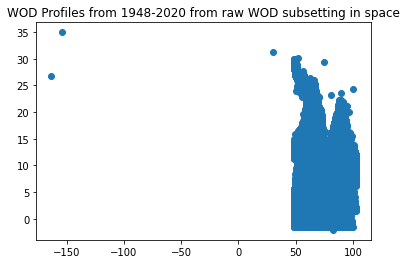

In [18]:
plt.scatter(ds_out.lon,ds_out.lat)
plt.title('WOD Profiles from 1948-2020 from raw WOD subsetting in space')

# Resubset in space - WOD subsetting missed a few points

Text(0.5, 1.0, 'WOD Profiles from 1948-2020 with refined spatial subsetting')

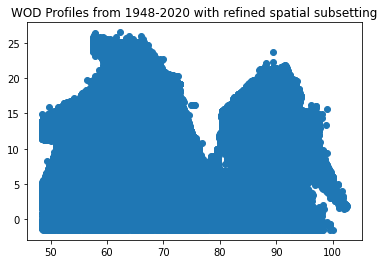

In [19]:
## intial general subset
ind = (ds_out.lon < lon_bounds[1]) & (ds_out.lon > lon_bounds[0]) & (ds_out.lat < lat_bounds[1]) & (ds_out.lat > lat_bounds[0])

lat = ds_out.lat[ind]
lon = ds_out.lon[ind]
temp = ds_out.temp[ind,:]
sal = ds_out.sal[ind,:]
doxy = ds_out.doxy[ind,:]
nitrate = ds_out.nitrate[ind,:]
phosphate = ds_out.phosphate[ind,:]
cast_id = ds_out.cast_id[ind]
t = ds_out.time[ind]
depth = ds_out.depth

# below trims the data on land etc.

# take away outside BoB
ind = (lon < 110) & (lon > 99) & (lat < 15) & (lat > 8)

lat = lat[~ind]
lon = lon[~ind]
temp = temp[~ind,:]
sal = sal[~ind,:]
doxy = doxy[~ind,:]
nitrate = nitrate[~ind,:]
phosphate = phosphate[~ind,:]
cast_id = cast_id[~ind]
t = t[~ind]

ind = (lon < 110) & (lon > 100) & (lat < 9) & (lat > 5)

lat = lat[~ind]
lon = lon[~ind]
temp = temp[~ind,:]
sal = sal[~ind,:]
doxy = doxy[~ind,:]
nitrate = nitrate[~ind,:]
phosphate = phosphate[~ind,:]
cast_id = cast_id[~ind]
t = t[~ind]

ind = (lon < 57.5) & (lon > 45) & (lat < 30) & (lat > 22)

lat = lat[~ind]
lon = lon[~ind]
temp = temp[~ind,:]
sal = sal[~ind,:]
doxy = doxy[~ind,:]
nitrate = nitrate[~ind,:]
phosphate = phosphate[~ind,:]
cast_id = cast_id[~ind]
t = t[~ind]

ind = (lon < 60) & (lon > 45) & (lat < 32) & (lat > 28)

lat = lat[~ind]
lon = lon[~ind]
temp = temp[~ind,:]
sal = sal[~ind,:]
doxy = doxy[~ind,:]
nitrate = nitrate[~ind,:]
phosphate = phosphate[~ind,:]
cast_id = cast_id[~ind]
t = t[~ind]

ind = (lon < 82) & (lon > 70) & (lat < 32) & (lat > 21)

lat = lat[~ind]
lon = lon[~ind]
temp = temp[~ind,:]
sal = sal[~ind,:]
doxy = doxy[~ind,:]
nitrate = nitrate[~ind,:]
phosphate = phosphate[~ind,:]
cast_id = cast_id[~ind]
t = t[~ind]

ind = (lon < 104) & (lon > 94) & (lat < 32) & (lat > 19)

lat = lat[~ind]
lon = lon[~ind]
temp = temp[~ind,:]
sal = sal[~ind,:]
doxy = doxy[~ind,:]
nitrate = nitrate[~ind,:]
phosphate = phosphate[~ind,:]
cast_id = cast_id[~ind]
t = t[~ind]

plt.scatter(lon,lat)
plt.title('WOD Profiles from 1948-2020 with refined spatial subsetting')

In [20]:
ds_out=xr.Dataset(coords={'time': t,
                        'depth': depth})
# add to dataset
ds_out['temp'] = xr.DataArray(temp,dims = ['time','depth'],coords =[t,depth])
ds_out['sal'] = xr.DataArray(sal,dims = ['time','depth'],coords =[t,depth])
ds_out['doxy'] = xr.DataArray(doxy,dims = ['time','depth'],coords =[t,depth])
ds_out['nitrate'] = xr.DataArray(nitrate,dims = ['time','depth'],coords =[t,depth])
ds_out['phosphate'] = xr.DataArray(phosphate,dims = ['time','depth'],coords =[t,depth])
ds_out['lat'] = xr.DataArray(lat,dims = ['time'],coords =[t])
ds_out['lon'] = xr.DataArray(lon,dims = ['time'],coords =[t])
ds_out['cast_id'] = xr.DataArray(cast_id,dims = ['time'],coords =[t])
ds_out 

<xarray.Dataset>
Dimensions:    (depth: 57, time: 319847)
Coordinates:
  * time       (time) datetime64[ns] 1948-03-10 1948-03-11 ... 2020-05-31
  * depth      (depth) int64 0 5 10 15 20 25 ... 1250 1300 1350 1400 1450 1500
Data variables:
    temp       (time, depth) float64 30.11 29.81 29.54 29.3 ... nan nan nan nan
    sal        (time, depth) float64 34.48 34.58 34.67 34.75 ... nan nan nan nan
    doxy       (time, depth) float64 200.0 199.5 199.0 198.5 ... nan nan nan nan
    nitrate    (time, depth) float64 nan nan nan nan nan ... nan nan nan nan nan
    phosphate  (time, depth) float64 nan nan nan nan nan ... nan nan nan nan nan
    lat        (time) float32 -0.016666668 1.9333334 4.6 ... 15.8443 13.862
    lon        (time) float32 88.3 88.2 82.6 77.46667 ... 60.407 57.72186 67.64
    cast_id    (time) object 'OSD_160363' 'OSD_160376' ... 'PFL_19977773'

# Water Column Averages

In [21]:
# find mean temperature and doxy 40-200m
ind = (ds_out.depth>= 40) & (ds_out.depth<= 200)

doxy_40_200 = np.nanmean(ds_out.doxy[:,ind],1)
temp_40_200 = np.nanmean(ds_out.temp[:,ind],1)
sal_40_200 = np.nanmean(ds_out.sal[:,ind],1)
nitrate_40_200 = np.nanmean(ds_out.nitrate[:,ind],1)
phosphate_40_200 = np.nanmean(ds_out.phosphate[:,ind],1)

# find mean temperature and doxy 50-200m
ind = (ds_out.depth>= 50) & (ds_out.depth<= 200)

doxy_50_200 = np.nanmean(ds_out.doxy[:,ind],1)
temp_50_200 = np.nanmean(ds_out.temp[:,ind],1)
sal_50_200 = np.nanmean(ds_out.sal[:,ind],1)
nitrate_50_200 = np.nanmean(ds_out.nitrate[:,ind],1)
phosphate_50_200 = np.nanmean(ds_out.phosphate[:,ind],1)

# find mean temperature and doxy 50-225m
ind = (ds_out.depth>= 50) & (ds_out.depth<= 225)

doxy_50_225 = np.nanmean(ds_out.doxy[:,ind],1)
temp_50_225 = np.nanmean(ds_out.temp[:,ind],1)
sal_50_225 = np.nanmean(ds_out.sal[:,ind],1)
nitrate_50_225 = np.nanmean(ds_out.nitrate[:,ind],1)
phosphate_50_225 = np.nanmean(ds_out.phosphate[:,ind],1)

# add to dataset
ds_out['temp_40_200'] = xr.DataArray(temp_40_200,dims = ['time'],coords =[ds_out.time])
ds_out['doxy_40_200'] = xr.DataArray(doxy_40_200,dims = ['time'],coords =[ds_out.time])
ds_out['sal_40_200'] = xr.DataArray(sal_40_200,dims = ['time'],coords =[ds_out.time])
ds_out['nitrate_40_200'] = xr.DataArray(nitrate_40_200,dims = ['time'],coords =[ds_out.time])
ds_out['phosphate_40_200'] = xr.DataArray(phosphate_40_200,dims = ['time'],coords =[ds_out.time])

ds_out['temp_50_200'] = xr.DataArray(temp_50_200,dims = ['time'],coords =[ds_out.time])
ds_out['doxy_50_200'] = xr.DataArray(doxy_50_200,dims = ['time'],coords =[ds_out.time])
ds_out['sal_50_200'] = xr.DataArray(sal_50_200,dims = ['time'],coords =[ds_out.time])
ds_out['nitrate_50_200'] = xr.DataArray(nitrate_50_200,dims = ['time'],coords =[ds_out.time])
ds_out['phosphate_50_200'] = xr.DataArray(phosphate_50_200,dims = ['time'],coords =[ds_out.time])

ds_out['temp_50_225'] = xr.DataArray(temp_50_225,dims = ['time'],coords =[ds_out.time])
ds_out['doxy_50_225'] = xr.DataArray(doxy_50_225,dims = ['time'],coords =[ds_out.time])
ds_out['sal_50_225'] = xr.DataArray(sal_50_225,dims = ['time'],coords =[ds_out.time])
ds_out['nitrate_50_225'] = xr.DataArray(nitrate_50_225,dims = ['time'],coords =[ds_out.time])
ds_out['phosphate_50_225'] = xr.DataArray(phosphate_50_225,dims = ['time'],coords =[ds_out.time])


/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.
/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: Mean of empty slice
  del sys.path[0]
/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  
/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: Mean of empty slice
  from ipykerne

# Save Data

In [22]:
# delete if already present
if os.path.isfile(outfn):
    os.remove(outfn)

ds_out.to_netcdf(outfn,mode='w',format = "NETCDF4")
ds_out

<xarray.Dataset>
Dimensions:           (depth: 57, time: 319847)
Coordinates:
  * time              (time) datetime64[ns] 1948-03-10 1948-03-11 ... 2020-05-31
  * depth             (depth) int64 0 5 10 15 20 25 ... 1300 1350 1400 1450 1500
Data variables:
    temp              (time, depth) float64 30.11 29.81 29.54 ... nan nan nan
    sal               (time, depth) float64 34.48 34.58 34.67 ... nan nan nan
    doxy              (time, depth) float64 200.0 199.5 199.0 ... nan nan nan
    nitrate           (time, depth) float64 nan nan nan nan ... nan nan nan nan
    phosphate         (time, depth) float64 nan nan nan nan ... nan nan nan nan
    lat               (time) float32 -0.016666668 1.9333334 ... 15.8443 13.862
    lon               (time) float32 88.3 88.2 82.6 ... 60.407 57.72186 67.64
    cast_id           (time) object 'OSD_160363' 'OSD_160376' ... 'PFL_19977773'
    temp_40_200       (time) float64 23.61 23.94 23.89 nan ... 24.28 23.95 25.41
    doxy_40_200       (time) fl